In [4]:
PIVOTS = 100
ITERATIONS = 200
EPS = 0.01

EDGE_WEIGHT = 30

DATASET_NAMES = [
    "3elt",
    "1138_bus",
    "bull",
    "chvatal",
    "cubical",
    "davis_southern_women",
    "desargues",
    "diamond",
    "dodecahedral",
    "dwt_1005",
    "dwt_2680",
    "florentine_families",
    "frucht",
    "heawood",
    "hoffman_singleton",
    "house_x",
    "house",
    "icosahedral",
    "karate_club",
    "krackhardt_kite",
    "les_miserables",
    "moebius_kantor",
    "octahedral",
    "pappus",
    "petersen",
    "poli",
    "qh882",
    "sedgewick_maze",
    "tutte",
    "USpowerGrid",
]

In [5]:
from egraph import Drawing, all_sources_bfs
from ex_utils.config.paths import get_dataset_path
from ex_utils.share import draw, draw_and_measure
from ex_utils.utils.graph import (
    egraph_graph,
    load_nx_graph,
    nx_graph_preprocessing,
)
import networkx as nx
import matplotlib.pyplot as plt
from time import perf_counter


{'angular_resolution': -16503.021484375, 'aspect_ratio': 0.7628402709960938, 'crossing_angle': -28907.53515625, 'crossing_number': -56104.0, 'gabriel_graph_property': -1788489.875, 'ideal_edge_length': -1936.90185546875, 'neighborhood_preservation': 0.40995144844055176, 'node_resolution': -9260924928.0, 'stress': -432979.875}


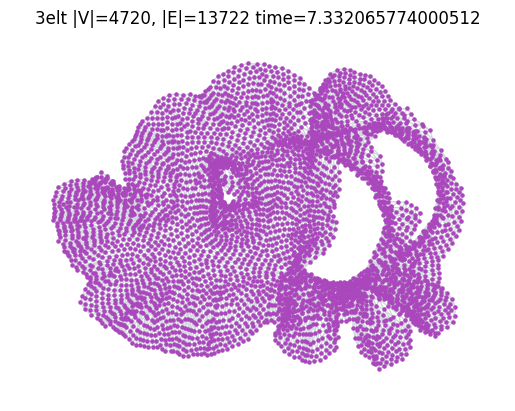

{'angular_resolution': -1303.7193603515625, 'aspect_ratio': 0.75496506690979, 'crossing_angle': -1753.569580078125, 'crossing_number': -3322.0, 'gabriel_graph_property': -392763.3125, 'ideal_edge_length': -292.2180480957031, 'neighborhood_preservation': 0.09050112217664719, 'node_resolution': -90082584.0, 'stress': -42605.5390625}


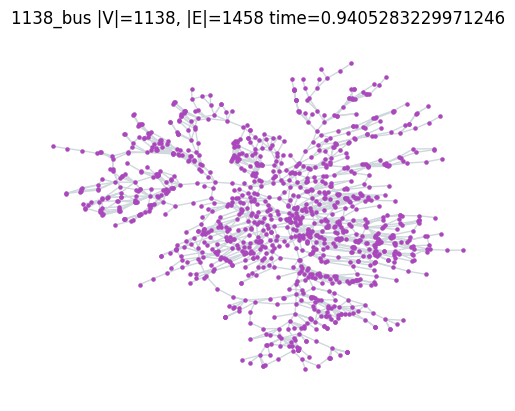

{'angular_resolution': -1.3456623554229736, 'aspect_ratio': 0.4861859977245331, 'crossing_angle': -2.402482032775879, 'crossing_number': -4.0, 'gabriel_graph_property': -4.547473508864641e-12, 'ideal_edge_length': -0.0018977840663865209, 'neighborhood_preservation': 1.0, 'node_resolution': -2.8459134101867676, 'stress': -0.005085165146738291}


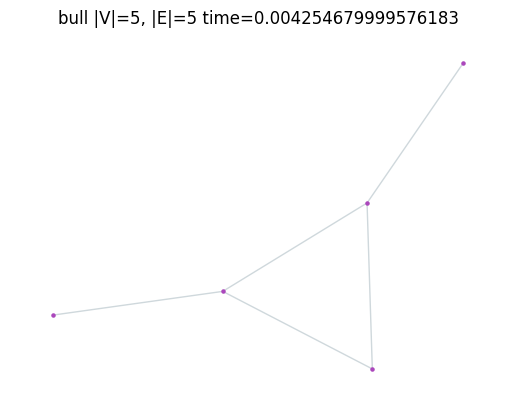

{'angular_resolution': -24.200542449951172, 'aspect_ratio': 0.9362180829048157, 'crossing_angle': -15.007795333862305, 'crossing_number': -42.0, 'gabriel_graph_property': -2511.7880859375, 'ideal_edge_length': -1.8575383424758911, 'neighborhood_preservation': 0.3333333432674408, 'node_resolution': -105.10368347167969, 'stress': -8.53332805633545}


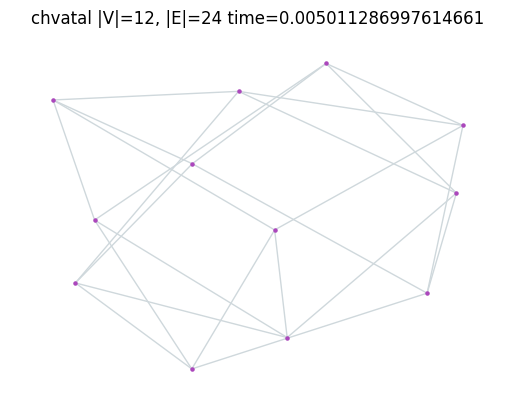

{'angular_resolution': -5.7761688232421875, 'aspect_ratio': 0.9566631317138672, 'crossing_angle': -3.270730972290039, 'crossing_number': -14.0, 'gabriel_graph_property': -291.8792724609375, 'ideal_edge_length': -0.3221510350704193, 'neighborhood_preservation': 0.6000000238418579, 'node_resolution': -23.387428283691406, 'stress': -2.3796634674072266}


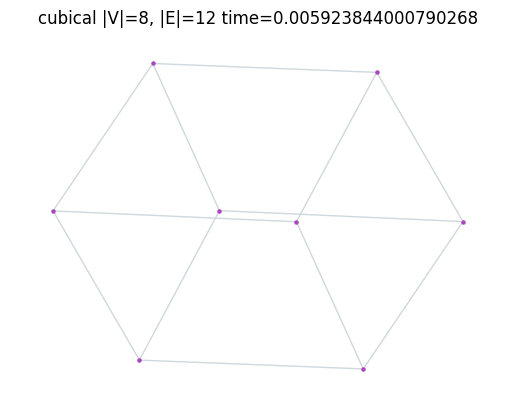

{'angular_resolution': -173.05007934570312, 'aspect_ratio': 0.7511358857154846, 'crossing_angle': -40.780696868896484, 'crossing_number': -143.0, 'gabriel_graph_property': -9848.716796875, 'ideal_edge_length': -6.687174320220947, 'neighborhood_preservation': 0.3136531412601471, 'node_resolution': -1996.7340087890625, 'stress': -48.907508850097656}


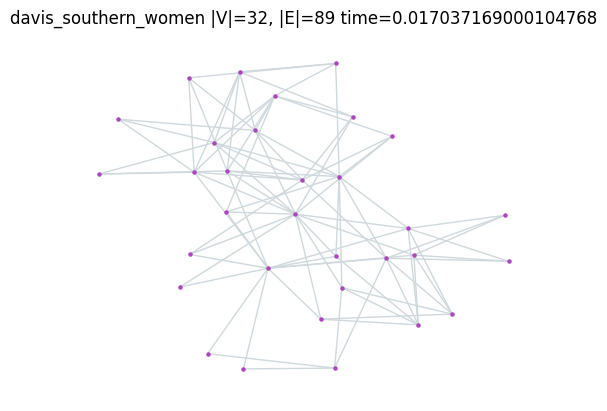

{'angular_resolution': -11.140365600585938, 'aspect_ratio': 0.979299008846283, 'crossing_angle': -17.405624389648438, 'crossing_number': -48.0, 'gabriel_graph_property': -1507.3326416015625, 'ideal_edge_length': -2.613906145095825, 'neighborhood_preservation': 0.27659574151039124, 'node_resolution': -466.0775146484375, 'stress': -23.966489791870117}


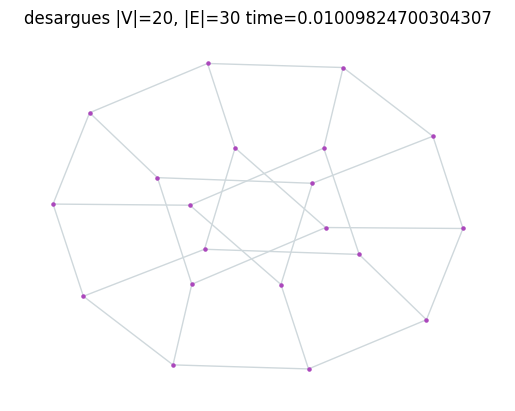

{'angular_resolution': -2.339616298675537, 'aspect_ratio': 0.5389228463172913, 'crossing_angle': -1.054866075515747, 'crossing_number': -4.0, 'gabriel_graph_property': -9.094947017729282e-13, 'ideal_edge_length': -0.0035676050465554, 'neighborhood_preservation': 1.0, 'node_resolution': -1.080016016960144, 'stress': -0.012771571055054665}


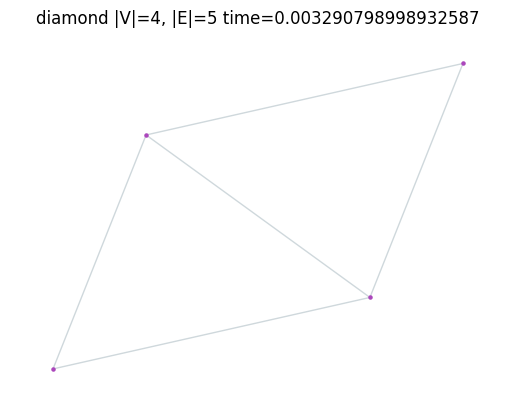

{'angular_resolution': -10.239080429077148, 'aspect_ratio': 1.0, 'crossing_angle': -12.806724548339844, 'crossing_number': -44.0, 'gabriel_graph_property': -1757.0675048828125, 'ideal_edge_length': -1.855449914932251, 'neighborhood_preservation': 0.5, 'node_resolution': -555.2664794921875, 'stress': -15.899785041809082}


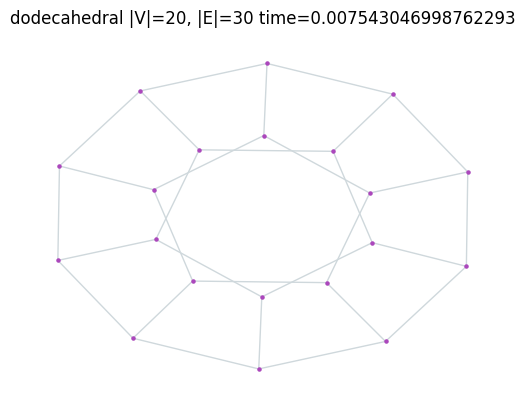

{'angular_resolution': -8746.3779296875, 'aspect_ratio': 0.9834797382354736, 'crossing_angle': -11581.6162109375, 'crossing_number': -25706.0, 'gabriel_graph_property': -266706.4375, 'ideal_edge_length': -444.6692810058594, 'neighborhood_preservation': 0.4045182168483734, 'node_resolution': -77352424.0, 'stress': -11274.2685546875}


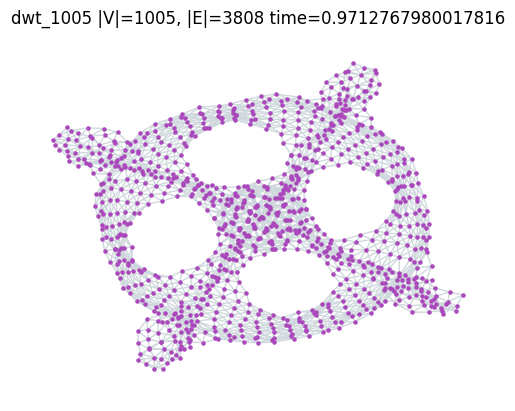

{'angular_resolution': -24795.998046875, 'aspect_ratio': 0.20037603378295898, 'crossing_angle': -36123.28125, 'crossing_number': -77373.0, 'gabriel_graph_property': -1689690.75, 'ideal_edge_length': -1569.0426025390625, 'neighborhood_preservation': 0.3383643329143524, 'node_resolution': -1309196288.0, 'stress': -48310.8828125}


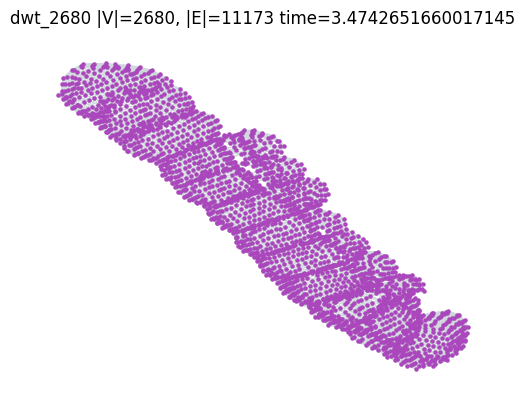

{'angular_resolution': -9.181577682495117, 'aspect_ratio': 0.8254163265228271, 'crossing_angle': -9.830690383911133, 'crossing_number': -24.0, 'gabriel_graph_property': -0.05554668605327606, 'ideal_edge_length': -0.5836380124092102, 'neighborhood_preservation': 0.8181818127632141, 'node_resolution': -115.85575866699219, 'stress': -2.884464979171753}


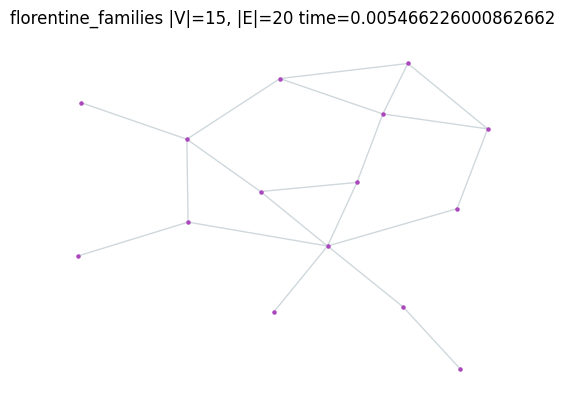

{'angular_resolution': -8.743030548095703, 'aspect_ratio': 0.8332496285438538, 'crossing_angle': -6.707403182983398, 'crossing_number': -20.0, 'gabriel_graph_property': -463.6374206542969, 'ideal_edge_length': -1.1782639026641846, 'neighborhood_preservation': 0.6744186282157898, 'node_resolution': -108.30618286132812, 'stress': -3.2483978271484375}


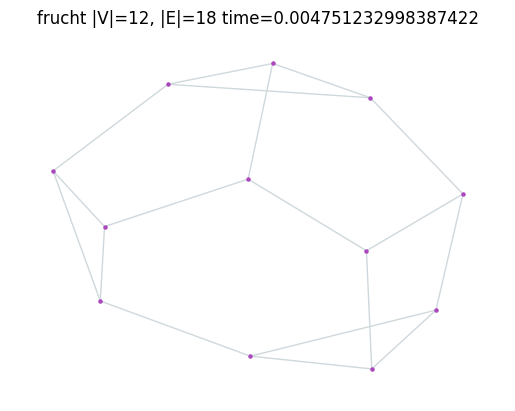

{'angular_resolution': -11.661564826965332, 'aspect_ratio': 0.9892207384109497, 'crossing_angle': -12.10948657989502, 'crossing_number': -32.0, 'gabriel_graph_property': -2358.42724609375, 'ideal_edge_length': -2.0225512981414795, 'neighborhood_preservation': 0.18309858441352844, 'node_resolution': -178.85206604003906, 'stress': -13.264644622802734}


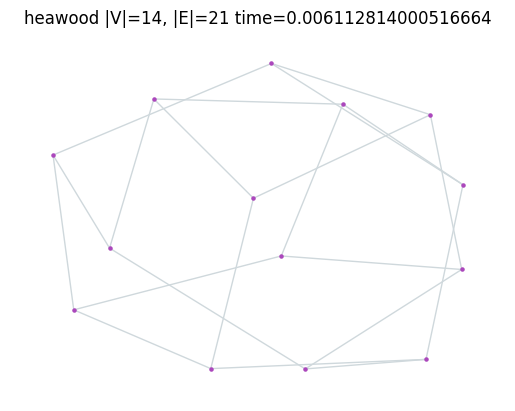

{'angular_resolution': -389.07879638671875, 'aspect_ratio': 0.9975795745849609, 'crossing_angle': -669.0426635742188, 'crossing_number': -1794.0, 'gabriel_graph_property': -124015.6796875, 'ideal_edge_length': -34.65900421142578, 'neighborhood_preservation': 0.024890189990401268, 'node_resolution': -11749.7529296875, 'stress': -225.82354736328125}


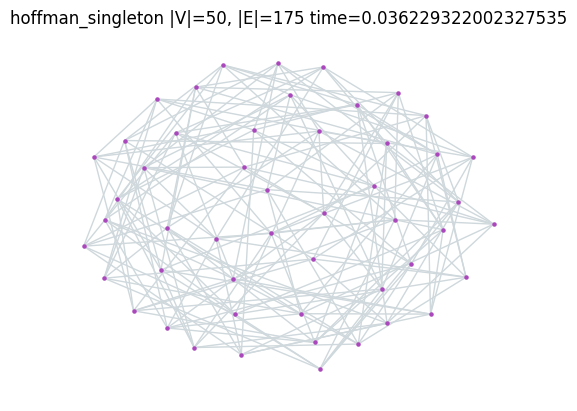

{'angular_resolution': -5.9567108154296875, 'aspect_ratio': 0.5581508874893188, 'crossing_angle': -3.1104989051818848, 'crossing_number': -9.0, 'gabriel_graph_property': -0.1371813416481018, 'ideal_edge_length': -0.17554037272930145, 'neighborhood_preservation': 1.0, 'node_resolution': -3.581923007965088, 'stress': -0.18382540345191956}


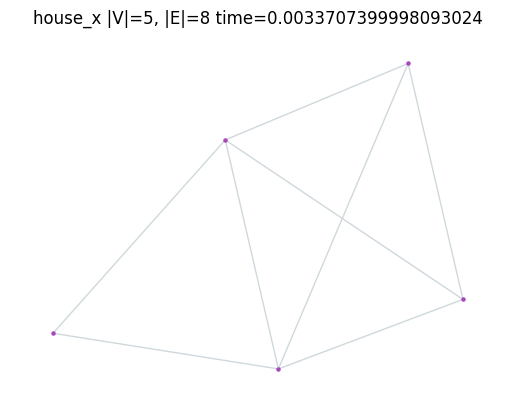

{'angular_resolution': -2.0396676063537598, 'aspect_ratio': 0.6583709120750427, 'crossing_angle': -1.707937479019165, 'crossing_number': -5.0, 'gabriel_graph_property': -8.185452315956354e-12, 'ideal_edge_length': -0.02725510112941265, 'neighborhood_preservation': 1.0, 'node_resolution': -4.2763166427612305, 'stress': -0.1372600495815277}


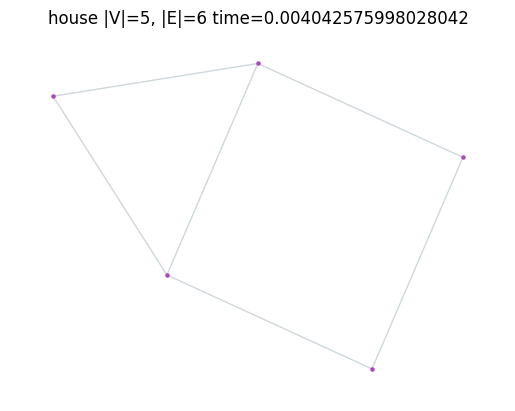

{'angular_resolution': -36.720672607421875, 'aspect_ratio': 0.9979501366615295, 'crossing_angle': -17.579038619995117, 'crossing_number': -52.0, 'gabriel_graph_property': -2057.45703125, 'ideal_edge_length': -2.1178956031799316, 'neighborhood_preservation': 0.5789473652839661, 'node_resolution': -112.25779724121094, 'stress': -5.3713836669921875}


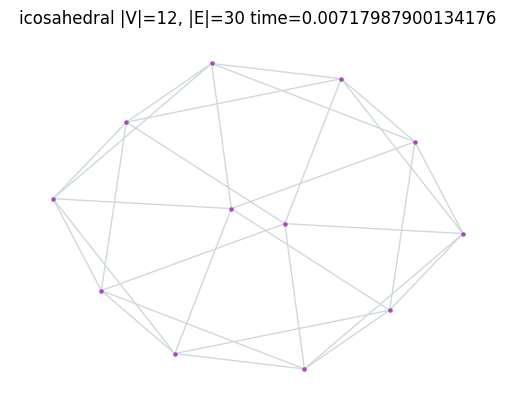

{'angular_resolution': -148.68003845214844, 'aspect_ratio': 0.5906072854995728, 'crossing_angle': -46.673057556152344, 'crossing_number': -143.0, 'gabriel_graph_property': -2990.0576171875, 'ideal_edge_length': -5.733460903167725, 'neighborhood_preservation': 0.4377880096435547, 'node_resolution': -1586.523193359375, 'stress': -37.88864517211914}


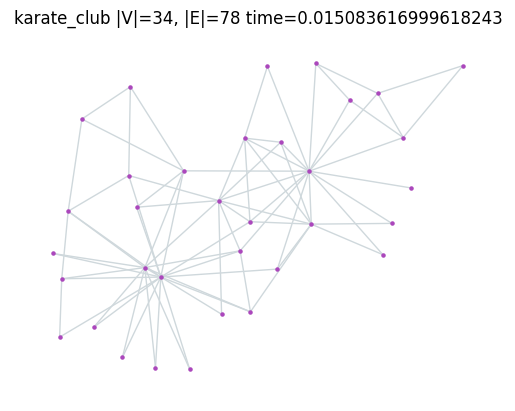

{'angular_resolution': -14.737724304199219, 'aspect_ratio': 0.4774388372898102, 'crossing_angle': -14.027718544006348, 'crossing_number': -29.0, 'gabriel_graph_property': -9.986331939697266, 'ideal_edge_length': -0.3955542743206024, 'neighborhood_preservation': 1.0, 'node_resolution': -34.10567092895508, 'stress': -0.6225214004516602}


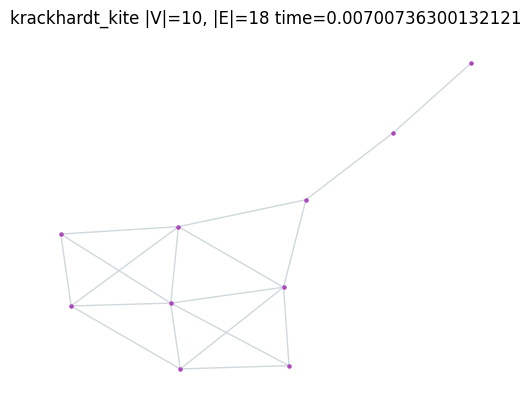

{'angular_resolution': -915.4356079101562, 'aspect_ratio': 0.9433895349502563, 'crossing_angle': -688.1917724609375, 'crossing_number': -1783.0, 'gabriel_graph_property': -31026.84375, 'ideal_edge_length': -31.292804718017578, 'neighborhood_preservation': 0.4493580460548401, 'node_resolution': -26862.9609375, 'stress': -240.9077911376953}


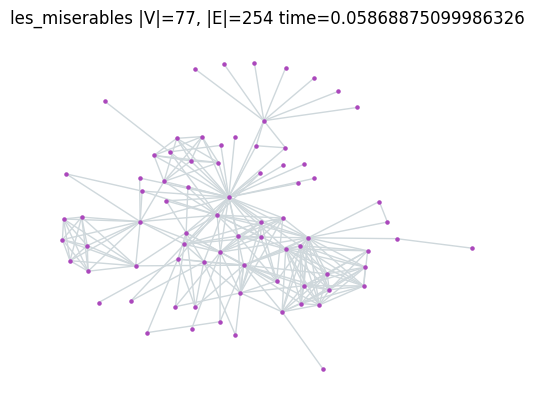

{'angular_resolution': -11.315145492553711, 'aspect_ratio': 0.9763736724853516, 'crossing_angle': -15.284500122070312, 'crossing_number': -36.0, 'gabriel_graph_property': -2503.977294921875, 'ideal_edge_length': -2.459761142730713, 'neighborhood_preservation': 0.2467532455921173, 'node_resolution': -239.46009826660156, 'stress': -15.659045219421387}


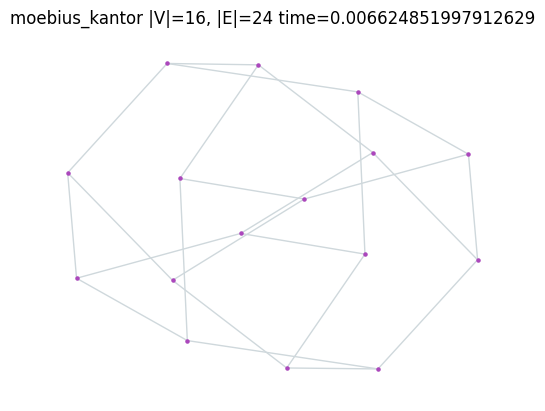

{'angular_resolution': -12.447579383850098, 'aspect_ratio': 0.9988648891448975, 'crossing_angle': -5.75082540512085, 'crossing_number': -17.0, 'gabriel_graph_property': -373.0475158691406, 'ideal_edge_length': -0.8333539962768555, 'neighborhood_preservation': 1.0, 'node_resolution': -14.10145092010498, 'stress': -1.0718005895614624}


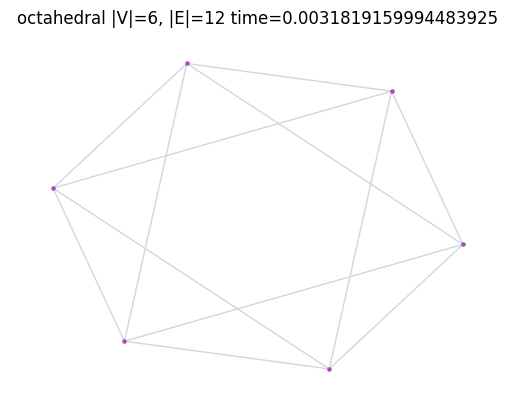

{'angular_resolution': -11.876062393188477, 'aspect_ratio': 0.979957640171051, 'crossing_angle': -14.236793518066406, 'crossing_number': -43.0, 'gabriel_graph_property': -3240.20556640625, 'ideal_edge_length': -3.144294023513794, 'neighborhood_preservation': 0.20000000298023224, 'node_resolution': -347.4474182128906, 'stress': -23.633872985839844}


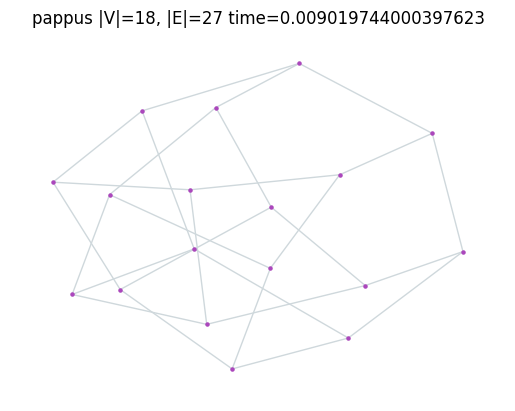

{'angular_resolution': -8.430510520935059, 'aspect_ratio': 0.9834285378456116, 'crossing_angle': -4.031896114349365, 'crossing_number': -20.0, 'gabriel_graph_property': -1022.4736938476562, 'ideal_edge_length': -0.9930757284164429, 'neighborhood_preservation': 0.3333333432674408, 'node_resolution': -54.236541748046875, 'stress': -5.228532314300537}


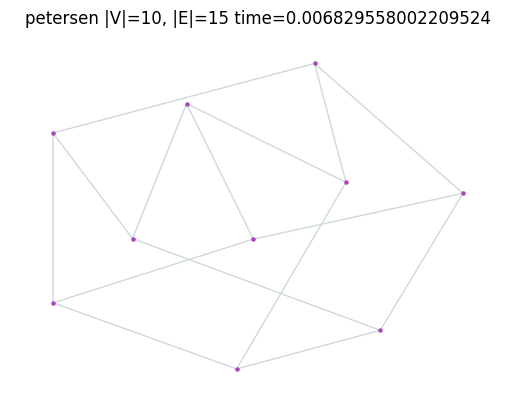

{'angular_resolution': -14639.13671875, 'aspect_ratio': 0.7020079493522644, 'crossing_angle': -4813.7119140625, 'crossing_number': -10359.0, 'gabriel_graph_property': -4804513.5, 'ideal_edge_length': -791.6737670898438, 'neighborhood_preservation': 0.05991058051586151, 'node_resolution': -646244480.0, 'stress': -238329.71875}


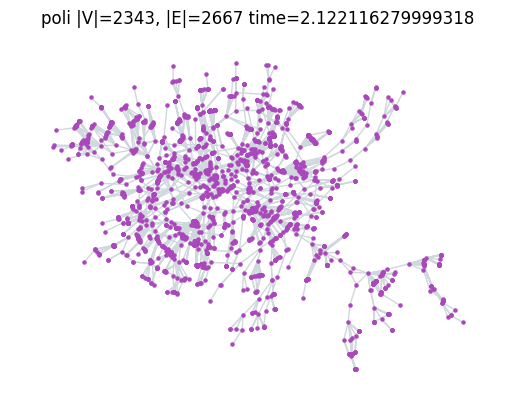

{'angular_resolution': -1703.8548583984375, 'aspect_ratio': 0.9051588773727417, 'crossing_angle': -1816.39013671875, 'crossing_number': -4077.0, 'gabriel_graph_property': -222145.421875, 'ideal_edge_length': -237.0636749267578, 'neighborhood_preservation': 0.20211723446846008, 'node_resolution': -47409868.0, 'stress': -19389.3515625}


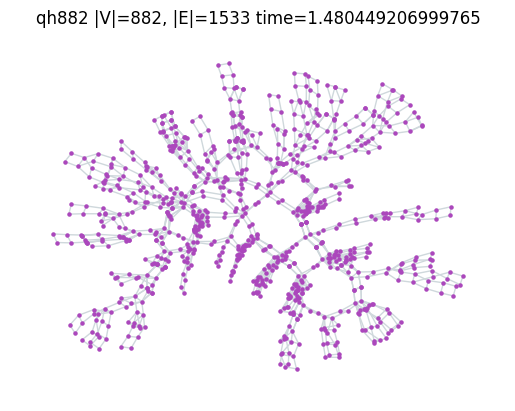

{'angular_resolution': -3.9292445182800293, 'aspect_ratio': 0.8482155203819275, 'crossing_angle': -1.111014723777771, 'crossing_number': -5.0, 'gabriel_graph_property': -14.198461532592773, 'ideal_edge_length': -0.3237321972846985, 'neighborhood_preservation': 0.6666666865348816, 'node_resolution': -21.878480911254883, 'stress': -1.0537891387939453}


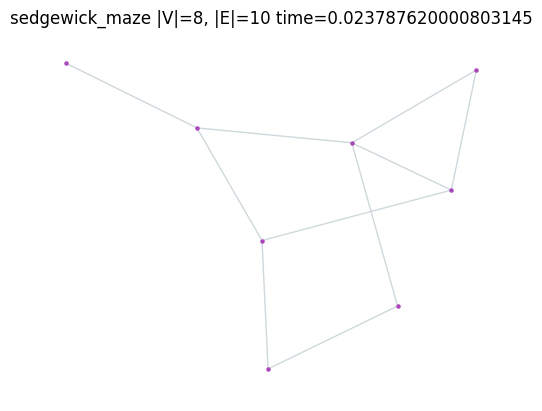

{'angular_resolution': -25.66983985900879, 'aspect_ratio': 0.999687671661377, 'crossing_angle': -32.854248046875, 'crossing_number': -92.0, 'gabriel_graph_property': -3153.3955078125, 'ideal_edge_length': -4.731320858001709, 'neighborhood_preservation': 0.4300518035888672, 'node_resolution': -8131.990234375, 'stress': -53.24763488769531}


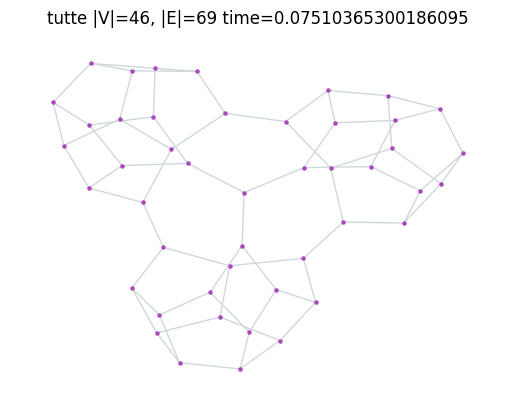

{'angular_resolution': -7236.38818359375, 'aspect_ratio': 0.8693054914474487, 'crossing_angle': -15621.86328125, 'crossing_number': -25224.0, 'gabriel_graph_property': -10705965.0, 'ideal_edge_length': -3103.07861328125, 'neighborhood_preservation': 0.034028541296720505, 'node_resolution': -8678172672.0, 'stress': -730569.8125}


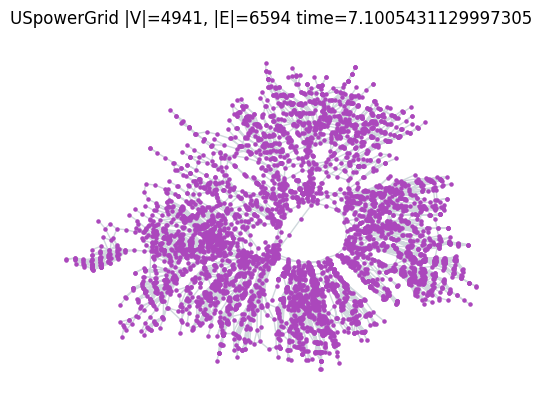

In [6]:
params = {
    "pivots": PIVOTS,
    "iterations": ITERATIONS,
    "eps": EPS,
}

for dataset_name in DATASET_NAMES:
    dataset_path = get_dataset_path(dataset_name=dataset_name)
    nx_graph = nx_graph_preprocessing(
        load_nx_graph(dataset_path=dataset_path), EDGE_WEIGHT
    )

    eg_graph, eg_indices = egraph_graph(nx_graph=nx_graph)

    eg_drawing = Drawing.initial_placement(eg_graph)
    eg_distance_matrix = all_sources_bfs(eg_graph, EDGE_WEIGHT)

    start = perf_counter()
    params, quality_metrics, pos = draw_and_measure(
        pivots=PIVOTS,
        iterations=ITERATIONS,
        eps=EPS,
        eg_graph=eg_graph,
        eg_indices=eg_indices,
        eg_drawing=eg_drawing,
        eg_distance_matrix=eg_distance_matrix,
        edge_weight=EDGE_WEIGHT,
        seed=0,
    )
    end = perf_counter()

    plt.title(
        f"{dataset_name} |V|={len(nx_graph.nodes)}, |E|={len(nx_graph.edges)} time={end - start}"
    )

    nx.draw(
        nx_graph,
        pos=pos,
        node_size=5,
        node_color="#AB47BC",
        edge_color="#CFD8DC",
    )

    print(quality_metrics)

    plt.show()